In [12]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
warnings.simplefilter("ignore")
%matplotlib inline

In [39]:
from sklearn.model_selection import train_test_split, validation_curve

In [2]:
data = pd.read_csv("data.csv")
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.isnull().sum()

TransactionID         0
isFraud               0
TransactionDT         0
TransactionAmt        0
ProductCD             0
                  ...  
V335              68229
V336              68229
V337              68229
V338              68229
V339              68229
Length: 394, dtype: int64

In [4]:
data.isnull().mean()

TransactionID     0.00000
isFraud           0.00000
TransactionDT     0.00000
TransactionAmt    0.00000
ProductCD         0.00000
                   ...   
V335              0.68229
V336              0.68229
V337              0.68229
V338              0.68229
V339              0.68229
Length: 394, dtype: float64

In [5]:
without_missing = data.columns[data.isnull().sum() == 0]
without_missing

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97',
       'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106',
       'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115',
       'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124',
       'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133',
       'V134', 'V135', 'V136', 'V137', 'V281', 'V282', 'V283', 'V288', 'V289',
       'V296', 'V300', 'V301', 'V313', 'V314', 'V315'],
      dtype='object')

In [6]:
X = data[['TransactionAmt', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1']]
y = data['isFraud']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
# Создание и обучение модели дерева решений
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

# Предсказание вероятностей принадлежности к положительному классу на обучающей выборке
y_train_pred_proba = tree.predict_proba(X_train)[:, 1]

# Оценка ROC-AUC на обучающей выборке
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)

# Вывод результата
print(f'ROC-AUC на обучающей выборке: {roc_auc_train}')

ROC-AUC на обучающей выборке: 0.999969416935695


In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
proba = model.predict_proba(X_val)

In [36]:
proba_positive = proba[:, 1]

In [37]:
# Расчет ROC-AUC
roc_auc = roc_auc_score(y_val, proba_positive)

# Округление до 4 знаков
roc_auc_rounded = round(roc_auc, 4)

# Вывод результата
print(roc_auc_rounded)

0.7836


In [38]:
train_score = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
valid_score = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

print(f"Train-score: {round(train_score, 4)}, Valid-score: {round(valid_score, 4)}")

Train-score: 1.0, Valid-score: 0.7836


In [56]:
train_scores, valid_scores = validation_curve(
    X=X_train,
    y=y_train,
    estimator=DecisionTreeClassifier(random_state=27),
    param_range=[-1, 2, 3, 4, 5, 6, 7, 8],
    param_name="max_depth",
    scoring="roc_auc",
    n_jobs=-1,
    cv=5,
)

In [52]:
import warnings
from typing import Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve, learning_curve

In [54]:
def plot_validation_curves(train_scores: np.array,
                           valid_scores: np.array,
                           figsize: Tuple[int, int] = (8, 8)
                          ):
    """
    Визуализация процесса настройки гиперпараметра
    алгоритма машинного обучения. Визуализируется значение
    метрики качества на обучащей и тестовой части данных, на
    валидационной части данных и доверительные интервалы.

    Parameters
    ----------
    train_scores: np.array
        Значения метрики качества на обучающей выборке.

    valid_scores: np.array
        Значения метрики качества на валидационной выборке.

    """
    fig = plt.figure(figsize=figsize)

    #plt.subplot(121)
    plt.title("Validation Curves", size=15)
    plt.plot(
        range(train_scores.shape[0]),
        np.mean(train_scores, axis=1),
        label="train",
        linewidth=3,
        marker="s"
    )
    plt.fill_between(
        x=range(train_scores.shape[0]),
        y1=np.mean(train_scores, axis=1)-np.std(train_scores, axis=1),
        y2=np.mean(train_scores, axis=1)+np.std(train_scores, axis=1),
        alpha=0.25
    )
    #plt.subplot(121)
    plt.plot(
        range(train_scores.shape[0]),
        np.mean(valid_scores, axis=1),
        label="valid",
        linewidth=3,
        marker="s"
    )
    plt.fill_between(
        x=range(train_scores.shape[0]),
        y1=np.mean(valid_scores, axis=1)-np.std(valid_scores, axis=1),
        y2=np.mean(valid_scores, axis=1)+np.std(valid_scores, axis=1),
        alpha=0.25
    )
    plt.legend(loc="best", fontsize=14)
    plt.ylabel("roc_auc", size=15)

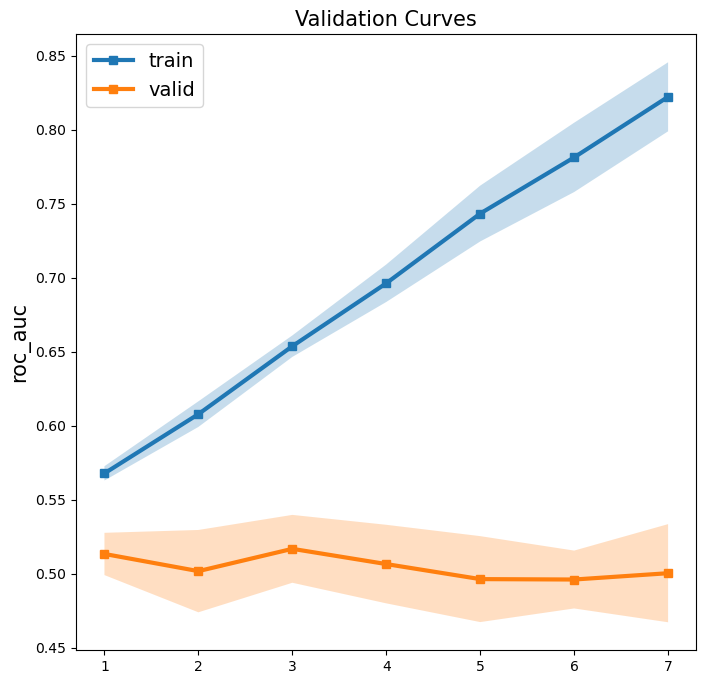

In [57]:
plot_validation_curves(
    train_scores, valid_scores
)

In [59]:
train_scores, valid_scores = validation_curve(
    X=X_train,
    y=y_train,
    estimator=DecisionTreeClassifier(max_depth=7, random_state=27),
    param_range=[1, 5, 10, 25, 50, 100, 250],
    param_name="min_samples_leaf",
    scoring="roc_auc",
    n_jobs=-1,
    cv=5,
)

Text(0.5, 0, 'min_samples_leaf')

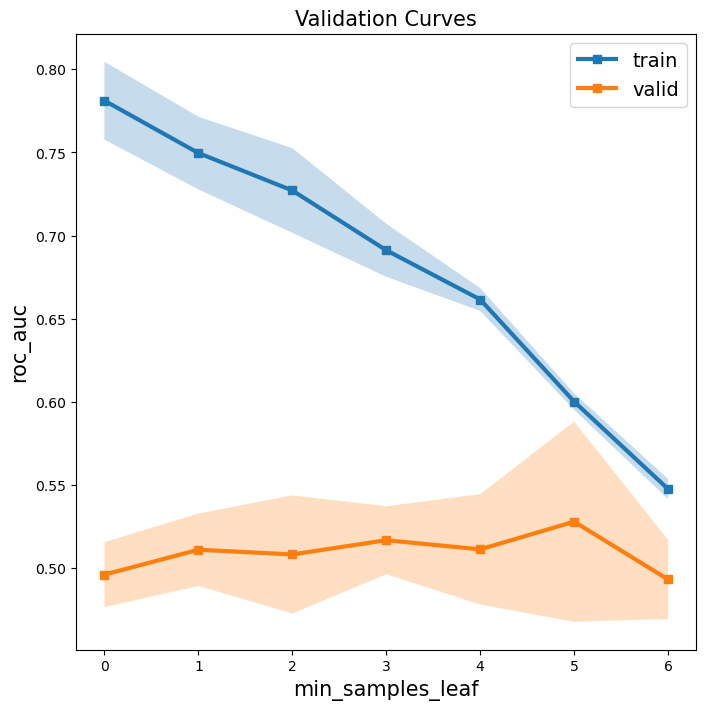

In [60]:
plot_validation_curves(
    train_scores, valid_scores
)
plt.xlabel("min_samples_leaf", size=15)

In [63]:
train_size, train_scores, valid_scores = learning_curve(
    X=X_train,
    y=y_train,
    estimator=DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=27),
    scoring="roc_auc",
    n_jobs=-1,
    cv=5
)

Text(0, 0.5, 'roc-auc')

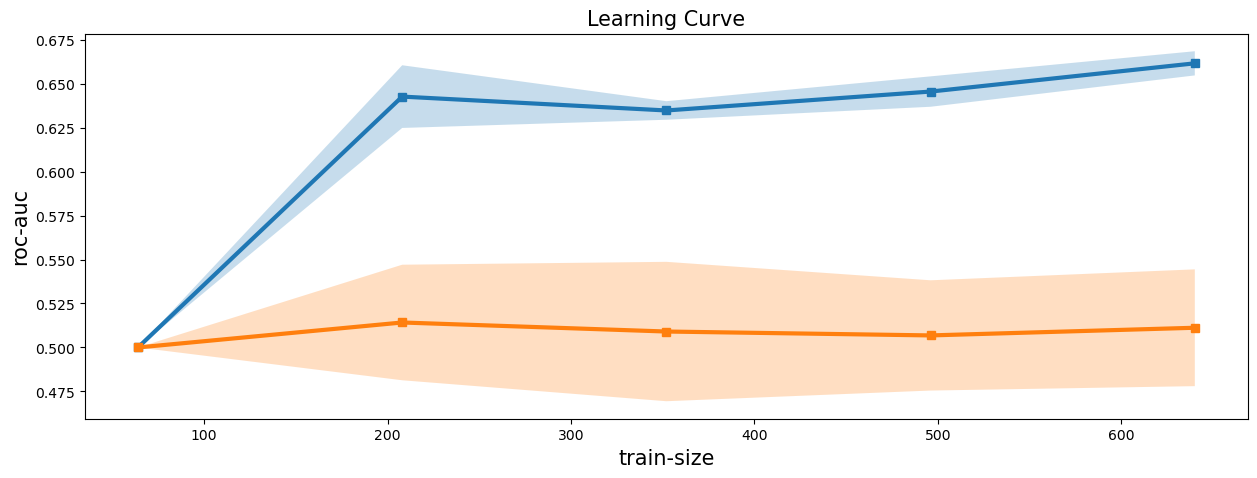

In [64]:
fig = plt.figure(figsize=(15, 5))
plt.plot(train_size, np.mean(train_scores, axis=1), marker="s", linewidth=3)
plt.fill_between(
    x=train_size,
    y1=np.mean(train_scores, axis=1)-np.std(train_scores, axis=1),
    y2=np.mean(train_scores, axis=1)+np.std(train_scores, axis=1),
    alpha=0.25
)
plt.plot(train_size, np.mean(valid_scores, axis=1), marker="s", linewidth=3)
plt.fill_between(
    x=train_size,
    y1=np.mean(valid_scores, axis=1)-np.std(valid_scores, axis=1),
    y2=np.mean(valid_scores, axis=1)+np.std(valid_scores, axis=1),
    alpha=0.25
)
plt.title("Learning Curve", size=15)
plt.xlabel("train-size", size=15)
plt.ylabel("roc-auc", size=15)